
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Machine Learning & Classification <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [100]:
# please fill in your student number and name
student_number = '401105989'
Name = 'Amirhosein'
Last_Name = 'Rezaei'

## Logistic Regression (50 points)

In this notebook, we will explore the fundamentals of classification in machine learning by implementing Logistic Regression from scratch, step by step.

#### Libraries

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### From scratch implementation (20 points)

- **Sigmoid Function**: Logistic Regression models the probability of a class label as:  
  
  $$
  P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = X \cdot w
  $$

  where $ w $ is the weight vector, $ X $ is the feature matrix, and $ \sigma(z) $ maps the input to a value between 0 and 1.

- **Binary Cross-Entropy Loss**: To train the model, we minimize the binary cross-entropy loss:  

  $$
  \mathcal{L} = -\frac{1}{n} \sum_{i=1}^n \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
  $$  

  Here, $ y_i $ is the true label, and $ \hat{y}_i $ is the predicted probability.

- **Gradient Descent (GD)**: To optimize the weights, we use Gradient Descent, an iterative algorithm that updates the weights in the direction of the negative gradient of the loss:  

  $$
  w \gets w - \alpha \cdot \nabla \mathcal{L}
  $$  

  where $ \alpha $ is the learning rate and $ \nabla \mathcal{L} $ is the gradient.



The class `LogisticRegressionGD` implements logistic regression with the following features:
- Binary classification using the sigmoid function.
- Training using gradient descent with a configurable learning rate, number of steps, and convergence tolerance.
- Validation accuracy tracking and loss history for monitoring training progress.
- Prediction capability and a confusion matrix visualization.

Let’s now implement this step by step and evaluate its performance on a classification dataset.

In [102]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


class LogisticRegressionGD:
    def __init__(self, learning_rate=0.1, n_steps=1000, tolerance=1e-6):
        """
        Initialize the parameters for the Logistic Regression model.
        """
        self.learning_rate = learning_rate
        self.n_steps = n_steps
        self.tolerance = tolerance
        self.weights = None
        self.bias = 0
        self.validation_accuracy = 0
        self.validation_accuracies = [.3]

    def sigmoid(self, z):
        """
        Apply the sigmoid function to scalar, vector, or matrix.
        """
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute the binary cross-entropy loss for the current weights.
        """
        n_samples = X.shape[0]
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
        return loss

    def compute_gradient(self, X, y):
        """
        Compute the gradient of the loss function with respect to the weights.
        """
        n_samples = X.shape[0]
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)
        return dw, db

    def test_accuracy(self, X_test, y_test):
        """
        Compute the accuracy of the model on test data.
        """
        y_pred = self.predict(X_test)
        correct_predictions = sum(y_pred == y_test)
        accuracy = (correct_predictions + 1) / (len(y_test) + 1)
        return accuracy

    def fit(self, X_train, y_train, X_val, y_val):
        """
        Train the Logistic Regression model using gradient descent.
        """
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        losses = []
        for step in range(1, self.n_steps + 1):
            dw, db = self.compute_gradient(X_train, y_train)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            loss = self.compute_loss(X_train, y_train)
            losses.append(loss)
            val_accuracy = self.test_accuracy(X_val, y_val)
            self.validation_accuracies.append(val_accuracy)
            self.validation_accuracy = val_accuracy
            if step % 100 == 0 or step == self.n_steps:
                print(f"Step {step}: Loss = {loss:.4f}, Validation Accuracy = {val_accuracy:.4f}")
            if len(losses) > 1 and abs(losses[-1] - losses[-2]) < self.tolerance:
                print(f"Converged at step {step}")
                break
        return losses

    def predict(self, X):
        """
        Predict binary labels for given data.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(linear_model)
        return (probabilities >= 0.5).astype(int)

    def plot_confusion_matrix(self, X_val, y_val, labels=None):
        """
        Plot the confusion matrix for the validation data.
        """
        y_pred = self.predict(X_val)
        cm = confusion_matrix(y_val, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap='Blues')
        plt.show()

Now that you have implemented the Logistic Regression class, let's test it on a sample dummy dataset and visualize the decision boundary:

Step 100: Loss = 0.1806, Validation Accuracy = 0.9524
Step 200: Loss = 0.1193, Validation Accuracy = 0.9524
Step 300: Loss = 0.0893, Validation Accuracy = 0.9524
Step 400: Loss = 0.0710, Validation Accuracy = 1.0000
Step 500: Loss = 0.0586, Validation Accuracy = 1.0000
Step 600: Loss = 0.0496, Validation Accuracy = 1.0000
Step 700: Loss = 0.0429, Validation Accuracy = 1.0000
Step 800: Loss = 0.0378, Validation Accuracy = 1.0000
Step 900: Loss = 0.0337, Validation Accuracy = 1.0000
Step 1000: Loss = 0.0303, Validation Accuracy = 1.0000
Step 1100: Loss = 0.0276, Validation Accuracy = 1.0000
Step 1200: Loss = 0.0252, Validation Accuracy = 1.0000
Step 1300: Loss = 0.0233, Validation Accuracy = 1.0000
Step 1400: Loss = 0.0216, Validation Accuracy = 1.0000
Step 1500: Loss = 0.0201, Validation Accuracy = 1.0000
Step 1600: Loss = 0.0188, Validation Accuracy = 1.0000
Step 1700: Loss = 0.0177, Validation Accuracy = 1.0000
Step 1800: Loss = 0.0167, Validation Accuracy = 1.0000
Step 1900: Loss = 0

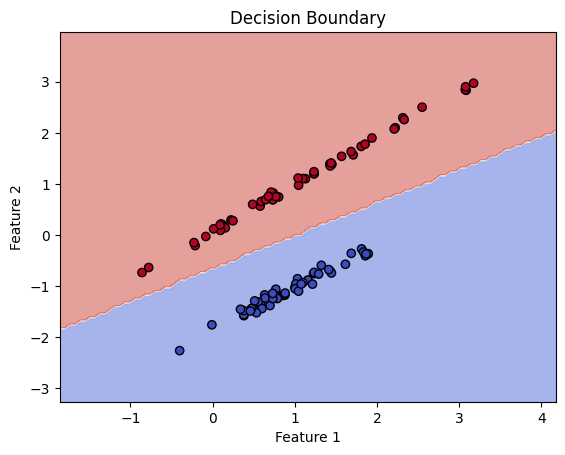

In [103]:
#TODO: create a sample linearly separable binary dataset and visualize the decision boundary
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, n_samples=100, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegressionGD(learning_rate=0.1, n_steps=10000)
losses = model.fit(X_train, y_train, X_val, y_val)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
grid = np.c_[xx1.ravel(), xx2.ravel()]
predictions = model.predict(grid).reshape(xx1.shape)
plt.contourf(xx1, xx2, predictions, alpha=0.5, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Towards real numerical datasets (15 points)

With our tools ready, we'll now work with the Breast Cancer dataset from scikit-learn—a classic binary classification dataset commonly used in machine learning. This dataset includes various features describing tumors, along with their corresponding labels (benign or malignant).

In [104]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA


#TODO: load breast cancer dataset and inspect it's features and target
data = load_breast_cancer()
X, y = data.data, data.target
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


As you are familiar with, adding bias term 1 is necessary as well:

In [105]:
#TODO: scale data, add bias term
X = StandardScaler().fit_transform(X)
X = np.c_[np.ones(X.shape[0]), X]

#TODO: split dataset into test and train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Since the dataset has a high number of features, we will use dimensionality reduction to make it easier to visualize. For this purpose, we will apply Principal Component Analysis (PCA):

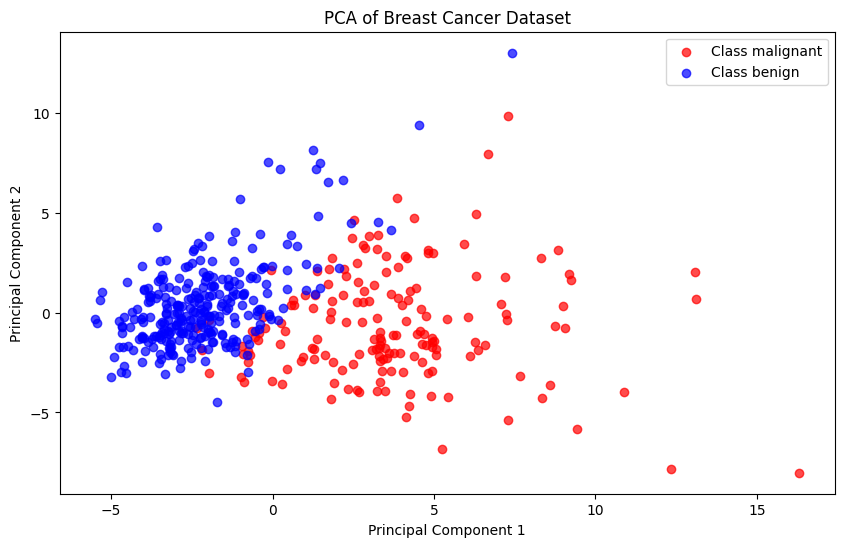

In [106]:
#TODO: reduce data into first two PCs and visualize the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train[:, 1:])
X_val_pca = pca.transform(X_val[:, 1:])
plt.figure(figsize=(10, 6))
colors = ['red', 'blue']
labels = ['Class malignant', 'Class benign']
for i, label in enumerate(np.unique(y_train)):
    plt.scatter(
        X_train_pca[y_train == label, 0],
        X_train_pca[y_train == label, 1],
        c=colors[i],
        label=labels[i],
        alpha=0.7
    )
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Finally, we will train the Logistic Regression model on this dataset. We will visualize the loss reduction during training and evaluate the model's performance using a confusion matrix:

In [107]:
#TODO: Train model and print out validation accuracy
model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000)
losses = model.fit(X_train, y_train, X_val, y_val)
print(f"Validation accuracy: {model.validation_accuracy:.4f}")

Step 100: Loss = 0.1055, Validation Accuracy = 0.9826
Step 200: Loss = 0.0871, Validation Accuracy = 0.9826
Step 300: Loss = 0.0789, Validation Accuracy = 0.9826
Step 400: Loss = 0.0739, Validation Accuracy = 0.9826
Step 500: Loss = 0.0704, Validation Accuracy = 0.9826
Step 600: Loss = 0.0677, Validation Accuracy = 0.9826
Step 700: Loss = 0.0656, Validation Accuracy = 0.9826
Step 800: Loss = 0.0639, Validation Accuracy = 0.9826
Step 900: Loss = 0.0625, Validation Accuracy = 0.9826
Step 1000: Loss = 0.0613, Validation Accuracy = 0.9826
Validation accuracy: 0.9826


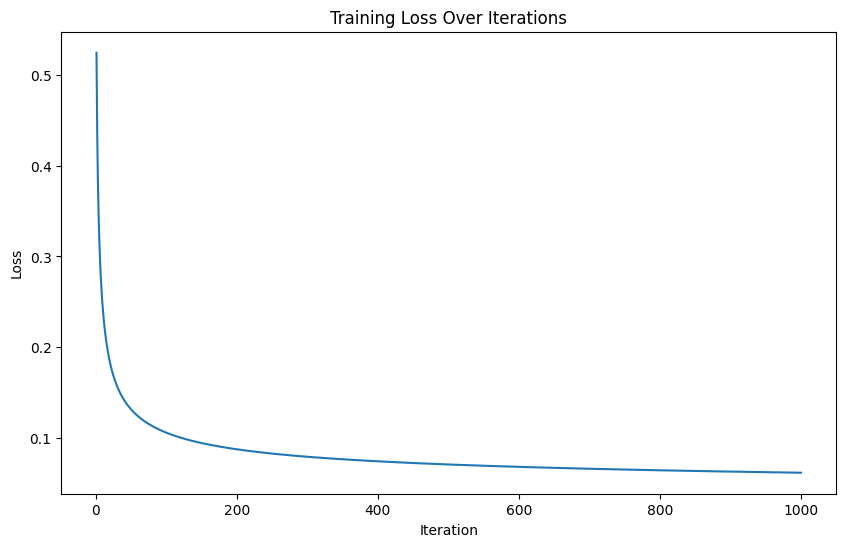

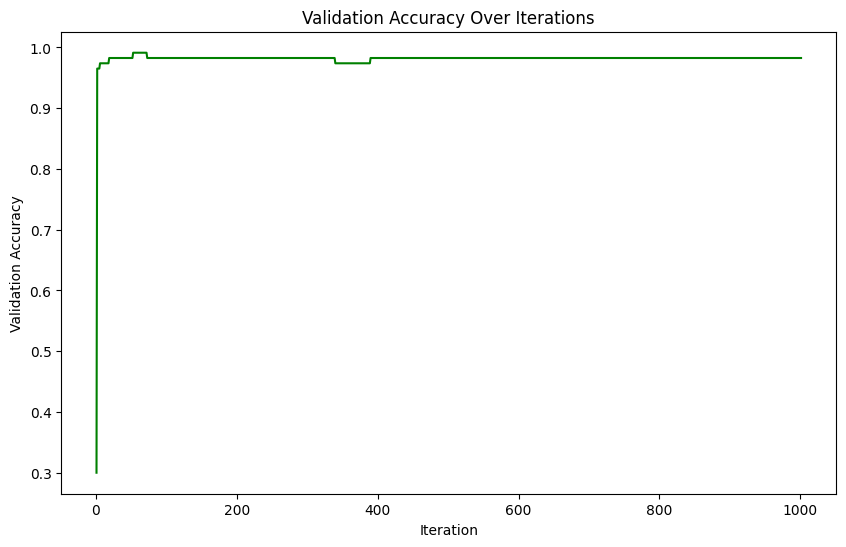

In [108]:
#TODO: plot training logss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses)
plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

#TODO: plot validation accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(model.validation_accuracies) + 1), model.validation_accuracies, color='green')
plt.title('Validation Accuracy Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Validation Accuracy')
plt.show()

**Why does the validation accuracy show a slight decrease?**

The slight decrease in validation accuracy is likely due to overfitting as the model starts to memorize training data patterns, oscillations near the optimal solution, or the loss of critical information from PCA dimensionality reduction. Such fluctuations are normal and suggest the model is nearing its best fit. Early stopping or learning rate adjustments can help mitigate this.

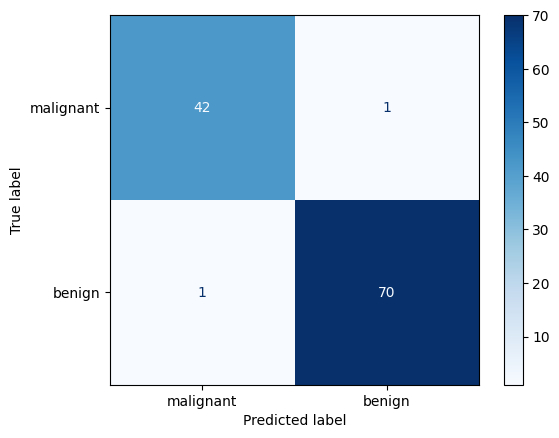

In [109]:
#TODO: plot confusion matrix
model.plot_confusion_matrix(X_val, y_val, labels=data.target_names)

### Towards real non-numerical datasets (15 points)

Up to this point, you have successfully implemented Logistic Regression from scratch and applied it to a numerical dataset (the Breast Cancer dataset, where all features were numerical).

Now, let’s take it a step further by applying your classifier to a non-numerical dataset. We will use the [Rotten Tomatoes Reviews dataset](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset), a popular dataset for sentiment analysis. This dataset contains movie reviews categorized into two classes: 'rotten' and 'fresh', representing binary sentiment classification.

To work with this dataset, we will first create embedding vectors for the text data. These embeddings will numerically represent each review and allow us to classify them based on their content. The focus will be on building meaningful embeddings that capture the essence of the reviews and using Logistic Regression to perform sentiment classification.

If you're using Google Colab, you can use the following cells to download and unzip the dataset directly. Alternatively, you may choose to download and extract it manually on your device

In [110]:
import os

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
!unzip rotten-tomatoes-movies-and-critic-reviews-dataset.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
License(s): CC0-1.0
rotten-tomatoes-movies-and-critic-reviews-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  rotten-tomatoes-movies-and-critic-reviews-dataset.zip
replace rotten_tomatoes_critic_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace rotten_tomatoes_movies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


#### Requierments
Please make sure that NLTK is available before proceeding to the next cells

In [111]:
!pip install nltk

#### Libraries

In [112]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from collections import defaultdict

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Since the dataset is quite large, we will focus on a subset of the data by selecting only reviews from top critics and movies with non-NaN review scores. Let's load this subset into a DataFrame and display the first couple of rows

In [113]:
#TODO: import data and filter out required rows
data_path = "/content/rotten_tomatoes_critic_reviews.csv"
reviews = pd.read_csv(data_path)
reviews = reviews[reviews['review_score'].notna()]

print(reviews)

        rotten_tomatoes_link        critic_name  top_critic  \
3                  m/0814255       Ben McEachen       False   
6                  m/0814255       Nick Schager       False   
7                  m/0814255   Bill Goodykoontz        True   
8                  m/0814255     Jordan Hoffman       False   
9                  m/0814255       Jim Schembri        True   
...                      ...                ...         ...   
1130012          m/zulu_dawn      Chuck O'Leary       False   
1130013          m/zulu_dawn          Ken Hanke       False   
1130014          m/zulu_dawn    Dennis Schwartz       False   
1130015          m/zulu_dawn  Christopher Lloyd       False   
1130016          m/zulu_dawn     Brent McKnight       False   

                          publisher_name review_type review_score review_date  \
3                Sunday Mail (Australia)       Fresh        3.5/5  2010-02-09   
6                         Slant Magazine      Rotten          1/4  2010-02-10   


To work with the text data, we need to preprocess it. For simplicity, we will perform the following preprocessing steps:
- Convert the text to lowercase
- Remove non-English characters
- Eliminate common English stopwords
- Apply lemmatization using NLTK

Since the dataset is quite large, performing this preprocessing on the CPU may take some time. If you have access to a GPU (either through Google Colab or your local device), we recommend setting the runtime_env to GPU for faster preprocessing. This will significantly speed up the process!

In [114]:
runtime_env = 'GPU' # or CPU

In [115]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

if runtime_env == 'GPU':
  import cudf
  import cupy as cp

  def preprocess_text_gpu(text_series):
      text_series = cudf.Series(text_series)
      text_series = text_series.str.lower()
      text_series = text_series.str.replace(r'[^a-z\s]', '', regex=True)
      text_series = text_series.to_pandas()

      processed_texts = []
      for text in text_series:
          tokens = word_tokenize(text)
          tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
          processed_texts.append(' '.join(tokens))
      return processed_texts

  reviews['processed_content'] = preprocess_text_gpu(reviews['review_content'].astype(str))

elif runtime_env == 'CPU':
  def preprocess_text(text):
      text = text.lower()
      text = re.sub(r'[^a-z\s]', '', text)
      tokens = word_tokenize(text)
      tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
      return ' '.join(tokens)

  reviews['processed_content'] = reviews['review_content'].astype(str).apply(preprocess_text)

print(reviews[['review_type', 'review_content', 'processed_content']].head())

  review_type                                     review_content  \
3       Fresh  Whether audiences will get behind The Lightnin...   
6      Rotten  Harry Potter knockoffs don't come more transpa...   
7       Fresh  Percy Jackson isn't a great movie, but it's a ...   
8       Fresh                         Fun, brisk and imaginative   
9       Fresh  Crammed with dragons, set-destroying fights an...   

                                   processed_content  
3  whether audience get behind lightning thief ha...  
6  harry potter knockoff dont come transparent sl...  
7  percy jackson isnt great movie good one trotti...  
8                              fun brisk imaginative  
9  crammed dragon setdestroying fight thing explo...  


Next, let’s visualize the distribution of the classes in the dataset.

This will help us determine whether the data is balanced between the two classes ('rotten' and 'fresh') or if there is an imbalance that might affect our model's performance.

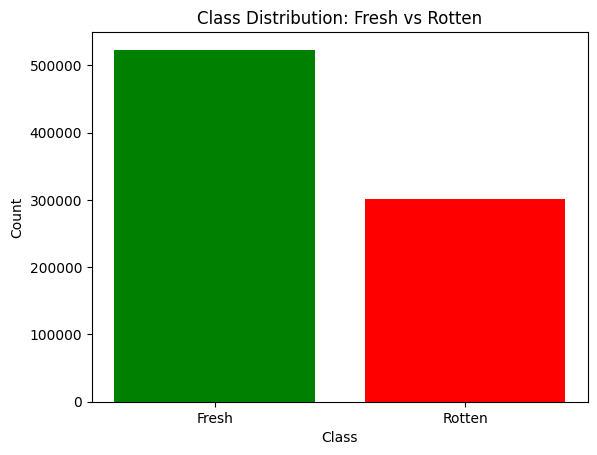

In [116]:
#TODO: inspect classes 'Rotten' and 'Fresh'
class_counts = reviews['review_type'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['green', 'red'])
plt.title("Class Distribution: Fresh vs Rotten")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In sentiment analysis, we often face the challenge of working with non-numerical data, such as text. To address this, we use [embeddings](https://www.geeksforgeeks.org/what-are-embeddings-in-machine-learning/). An embedding is a method for converting non-numerical data (like words or sentences) into numerical vectors, which can be processed by machine learning algorithms.

Embeddings can be fixed-size or variable-length, and there are many techniques to create them. Some embeddings, like GloVe and Word2Vec, are based on the context of words in a corpus. These methods capture semantic meaning by considering how words relate to each other in context. Alternatively, simpler embeddings, such as Bag-of-Words (BoW), are based on word frequencies within the text.

In this case, we will implement a simple approach. Instead of using pre-trained embeddings, we will create our own using word frequencies within the two classes: Fresh and Rotten.

Here’s the process:

1. Term Frequency (TF): We calculate the frequency of each word in the Fresh and Rotten reviews.
2. Document Frequency (DF): For each word, we calculate the number of reviews (documents) in which it appears.
3. TF-IDF Representation: Each review will be represented as a vector of two numbers:
  - The first number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Rotten class.
  - The second number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Fresh class.
4. Normalization: To ensure consistent scale and improve the performance of our model, we normalize the resulting vector.

This embedding is widely known as [TF-IDF](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/). It helps represent text by emphasizing words that are important to a specific document while reducing the influence of commonly occurring words across the dataset

In [117]:
#TODO: generate required tf/idf values
def calculate_tf_df(reviews, class_label):
    class_reviews = reviews[reviews['review_type'] == class_label]
    tf = defaultdict(int)
    df = defaultdict(int)

    for review in class_reviews['processed_content']:
        words = review.split()
        unique_words = set(words)
        for word in words:
            tf[word] += 1
        for word in unique_words:
            df[word] += 1

    return tf, df

fresh_tf, fresh_df = calculate_tf_df(reviews, 'Fresh')
rotten_tf, rotten_df = calculate_tf_df(reviews, 'Rotten')

def calculate_tfidf(tf, df, total_docs):
    tfidf = {}
    for word, freq in tf.items():
        tfidf[word] = freq * np.log(total_docs / (1 + df[word]))
    return tfidf

total_docs = len(reviews)
fresh_tfidf = calculate_tfidf(fresh_tf, fresh_df, total_docs)
rotten_tfidf = calculate_tfidf(rotten_tf, rotten_df, total_docs)


print(fresh_tfidf)
print(rotten_tfidf)

{'whether': 11668.479224800329, 'audience': 40279.14555573979, 'get': 58120.590937378336, 'behind': 13926.650046914914, 'lightning': 1283.0969328293154, 'thief': 1554.3086317912926, 'hard': 25626.26930140652, 'predict': 804.7324815686685, 'overall': 10990.769164905643, 'entertaining': 49860.1212104741, 'introduction': 3051.2250710898757, 'promising': 3731.3256886111226, 'new': 47602.41468032727, 'world': 46014.42744015264, 'consuming': 351.34768083013023, 'shadow': 5689.168366408146, 'potter': 5149.730041651749, 'big': 33143.382958775146, 'break': 9343.060841628801, 'free': 6189.20180886576, 'percy': 306.62480170107307, 'jackson': 5976.685744133879, 'isnt': 37574.45800470697, 'great': 63971.08417069313, 'movie': 164799.0380926724, 'good': 78935.67979050791, 'one': 131352.4740763797, 'trotting': 172.62097217560068, 'kernel': 259.0981891752444, 'greek': 2684.5769444419616, 'mythology': 2947.8157426270786, 'like': 98086.46638583958, 'many': 40105.773311947116, 'disney': 13632.370162149384

In [118]:
#TODO: create embedding vector in which first element represents 'Fresh' class score and second element represents 'Rotten' class score for each word
def create_embedding_vector(review):
    words = review.split()
    fresh_score = sum(fresh_tfidf.get(word, 0) for word in words)
    rotten_score = sum(rotten_tfidf.get(word, 0) for word in words)
    return [fresh_score, rotten_score]

embedding_vectors = reviews['processed_content'].apply(create_embedding_vector)

Next, we will use the Logistic Regression class that we implemented in previous sections to classify the reviews based on the embeddings we created.

In [119]:
#TODO: split dataset and train you model
X = np.vstack(embedding_vectors.values)
y = (reviews['review_type'] == 'Fresh').astype(int)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X)
print(y)

[[374379.44806615 215194.41745186]
 [112824.25041481  80088.42094694]
 [648000.39120027 451256.89559848]
 ...
 [102513.51772707  56933.41941044]
 [447542.93630119 272313.47697511]
 [176805.54081518  90922.48668184]]
3          1
6          0
7          1
8          1
9          1
          ..
1130012    0
1130013    1
1130014    1
1130015    0
1130016    0
Name: review_type, Length: 824081, dtype: int64



Validation accuracy: 0.8359
              precision    recall  f1-score   support

      Rotten       0.81      0.74      0.76     15165
       Fresh       0.82      0.85      0.83     21763

    accuracy                           0.81     36932
   macro avg       0.80      0.79      0.80     36932
weighted avg       0.81      0.81      0.80     36932



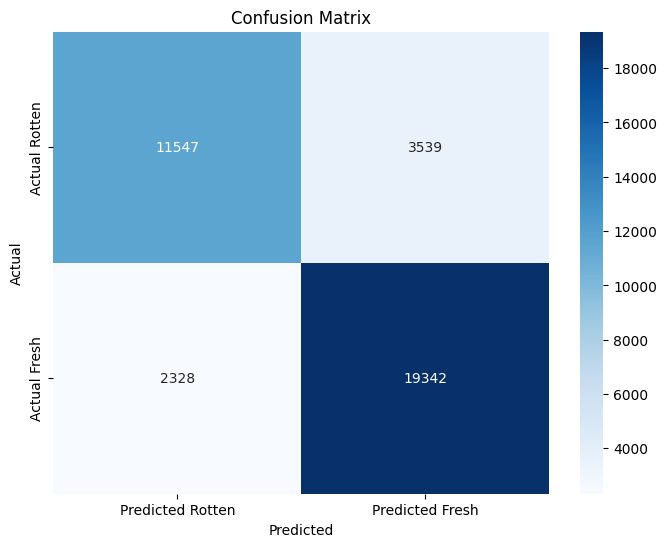

In [120]:
from sklearn.metrics import classification_report

#TODO: inspect the performance of model
model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000)
model.fit(X_train, y_train, X_val, y_val)
y_pred = model.predict(X_test)
print("Accuracy:", model.validation_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
labels = ["Predicted Rotten", "Predicted Fresh"]
model.plot_confusion_matrix(X_test, y_pred, labels=labels)

## Decision Tree (50 points)

In this section, you will implement a **Decision Tree (DT)** from scratch. We will use the [Bank Marketing Dataset from the UCI Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains a mix of **numerical** and **non-numerical** features.


### Libraries

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


First, let's load the dataset and inspect it:

In [122]:
#TODO: import dataset and inspect it
url = "/content/bank.csv"
data = pd.read_csv(url, delimiter=";")
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

### Implementation (20 points)

You will implement a class for a **Decision Tree** that includes:
1. **Entropy (H)** calculation.
2. **Information Gain (IG)** computation.
3. A method to split the dataset based on the best feature and decision thresholds.

**Entropy (H):** Entropy is a measure of the impurity or uncertainty of a dataset. It is given by:

$$ H(S) = - \sum_{i=1}^c p_i \log_2(p_i) $$

Where:
- $S$ is the dataset.
- $p_i$ is the proportion of samples in class $i$.
- $c$ is the total number of classes.

**Information Gain (IG):** Information Gain quantifies the reduction in entropy when a dataset is split on a particular feature. It is calculated as:

$$IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)$$

Where:
- $S$ is the dataset.
- $A$ is the feature used for the split.
- $\text{Values}(A)$ are the unique values of feature \(A\).
- $S_v$ is the subset of \(S\) where $A = v$.

The decision tree selects the feature and split point that maximizes the **Information Gain** at each node. The process is repeated recursively until:
1. The node becomes pure (contains only one class).
2. A stopping criterion like **maximum depth** is reached.


In [123]:
class DecisionTree:
    def __init__(self, max_depth=8):
        self.tree = None
        self.max_depth = max_depth

    def entropy(self, y):
        """Calculate the entropy of a dataset."""
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])

    def information_gain(self, X, y, feature_index):
        """Calculate the information gain for a feature."""
        parent_entropy = self.entropy(y)
        unique_values, counts = np.unique(X[:, feature_index], return_counts=True)
        weighted_entropy = 0
        for value, count in zip(unique_values, counts):
            subset = y[X[:, feature_index] == value]
            weighted_entropy += (count / len(y)) * self.entropy(subset)
        return parent_entropy - weighted_entropy

    def best_feature_to_split(self, X, y):
        """
        Find the best feature and threshold to split the dataset.
        Returns the index of the best feature and the optimal threshold.
        """
        best_feature = -1
        max_info_gain = -1
        for feature_index in range(X.shape[1]):
            info_gain = self.information_gain(X, y, feature_index)
            if info_gain > max_info_gain:
                max_info_gain = info_gain
                best_feature = feature_index
        return best_feature

    def fit(self, X, y, depth=0):
        """
        Fit the decision tree to the training data.
        Args:
            X: 2D numpy array of feature values.
            y: 1D numpy array of target values.
            depth (int): Current depth of the tree (default: 0).
        """
        if depth >= self.max_depth or len(set(y)) == 1:
            return np.bincount(y).argmax()
        best_feature = self.best_feature_to_split(X, y)
        if best_feature == -1:
            return np.bincount(y).argmax()
        tree = {best_feature: {}}
        unique_values = np.unique(X[:, best_feature])
        for value in unique_values:
            subset_X = X[X[:, best_feature] == value]
            subset_y = y[X[:, best_feature] == value]
            tree[best_feature][value] = self.fit(subset_X, subset_y, depth + 1)
        return tree

    def predict_sample(self, sample, tree):
        """
        Predict the label for a single sample by traversing the tree.
        Args:
            sample: A 1D numpy array of feature values.
            tree: The decision tree (dictionary).
        Returns:
            int or str: Predicted label for the sample.
        """
        if not isinstance(tree, dict):
            return tree
        feature = list(tree.keys())[0]
        value = sample[feature]
        subtree = tree[feature].get(value, None)
        if subtree is None:
            return np.random.choice(list(tree[feature].values()))
        return self.predict_sample(sample, subtree)

    def predict(self, X):
        """
        Predict the labels for a dataset by traversing the tree for each sample.
        Args:
            X: 2D numpy array of feature values.
        Returns:
            List[int or str]: Predicted labels for the dataset.
        """
        return [self.predict_sample(sample, self.tree) for sample in X]

### Testing (5 points)

Initially, we will treat **all features uniformly**, regardless of whether they are numerical or categorical. For example:
- The `month` column (categorical) and the `balance` column (continuous numerical) will both be handled the same way.

Now let's test the accuracy of model on dataset

In [128]:
#TODO: encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

#TODO: split dataset into features (X) and labels (y)
X = data.drop(columns=["y"])
y = data["y"]
X = X.values
y = y.values

#TODO: split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#TODO: train your model
dt = DecisionTree(max_depth=8)
dt.tree = dt.fit(X_train, y_train)

#TODO: make predictions on the test set
y_pred = dt.predict(X_test)

#TODO: evaluate the predictions
accuracy = np.mean(y_pred == y_test) * 100
print(f"Decision Tree Accuracy: {accuracy:.2f}%")

Decision Tree Accuracy: 47.58%


**Could you explain why is the Accuracy Poor?**

numerical features like balance or age are likely treated as categorical features or handled without evaluating thresholds and instead of splitting data using conditions like balance > 500, the algorithm might treat each unique value of balance as a separate category and this approach fails to capture meaningful patterns in continuous data and leads to fragmented and ineffective splits.

Without threshold-based splitting, the tree cannot effectively separate data based on numerical patterns and this results in splits that do not maximize Information Gain, leaving the tree less capable of reducing entropy at each node.

The tree may be prone to underfitting because it cannot find meaningful splits in numerical data, resulting in shallow or ineffective branches.

### Improved DT implementation (20 points)

In the previous implementation, all features—both numerical and categorical—were treated in the same way.

#### The Problem with Numerical Features:
Numerical features, like `balance` or `age`, require splitting data into intervals (e.g., "Is `balance > 500`?") rather than treating each unique value as a separate category. By failing to implement **threshold-based splits**, the tree:
- Cannot capture meaningful patterns in continuous data.
- Produces suboptimal splits, reducing accuracy and generalization.

To handle numerical features effectively, we need to:
1. Identify potential thresholds for splitting.
2. Calculate the **information gain** for each threshold.
3. Choose the threshold with the highest information gain.

#### Decision Rule for Numerical Features:
For a numerical feature \( f \), the dataset is split into two subsets:
- **Left subset**: $ X[f] \leq \text{threshold} $
- **Right subset**: $ X[f] > \text{threshold} $

The split maximizes the **Information Gain (IG)**:

$$
IG = H(parent) - \left( \frac{|left|}{|parent|} \cdot H(left) + \frac{|right|}{|parent|} \cdot H(right) \right)
$$

Where:
- $ H $ is the entropy.

**Try implementing the updated class and test it on the dataset again!**


In [125]:
class ImprovedDecisionTree:
    def __init__(self, max_depth=None):
        """
        Initialize the DecisionTree class.
        Args:
            max_depth (int, optional): Maximum depth of the tree. If None, the tree grows fully.
        """
        self.tree = None
        self.max_depth = max_depth

    def entropy(self, y):
        """Calculate the entropy of a dataset."""
        unique_classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities))

    def information_gain(self, X, y, feature_index):
        """Calculate the information gain for a categorical feature."""
        print(feature_index)
        print(X)
        feature_column = X[:, feature_index]
        parent_entropy = self.entropy(y)
        if np.issubdtype(feature_column.dtype, np.number):
            best_threshold, best_ig = self.find_best_threshold(feature_column, y)
            return best_ig
        else:
            unique_values = np.unique(feature_column)
            weighted_entropy = 0
            for value in unique_values:
                left_indices = np.where(feature_column == value)[0]
                right_indices = np.where(feature_column != value)[0]
                subset_entropy = (len(left_indices) / len(y)) * self.entropy(y[left_indices])
                weighted_entropy += subset_entropy
            return parent_entropy - weighted_entropy

    def find_best_threshold(self, feature_column, y):
        """
        Find the best threshold to split a numerical feature.
        Returns the thresholds and corresponding information gains.
        """
        sorted_indices = np.argsort(feature_column)
        feature_column = feature_column[sorted_indices]
        y = y[sorted_indices]
        best_threshold = None
        best_ig = -1
        parent_entropy = self.entropy(y)
        for i in range(1, len(feature_column)):
            if feature_column[i] != feature_column[i - 1]:
                threshold = (feature_column[i] + feature_column[i - 1]) / 2
                left_indices = feature_column <= threshold
                right_indices = feature_column > threshold
                left_entropy = self.entropy(y[left_indices])
                right_entropy = self.entropy(y[right_indices])
                weighted_entropy = (
                    (np.sum(left_indices) / len(y)) * left_entropy +
                    (np.sum(right_indices) / len(y)) * right_entropy
                )
                ig = parent_entropy - weighted_entropy
                if ig > best_ig:
                    best_ig = ig
                    best_threshold = threshold
        return best_threshold, best_ig

    def best_feature_to_split(self, X, y):
        """
        Determine the best feature and threshold to split the dataset.
        Returns the index of the best feature and the optimal threshold.
        """
        best_feature_index = None
        best_threshold = None
        best_ig = -1
        for feature_index in range(X.shape[1]):
            feature_column = X[:, feature_index]
            if np.issubdtype(feature_column.dtype, np.number):
                threshold, ig = self.find_best_threshold(feature_column, y)
            else:
                ig = self.information_gain(X, y, feature_index)
                threshold = None
            if ig > best_ig:
                best_ig = ig
                best_feature_index = feature_index
                best_threshold = threshold
        return best_feature_index, best_threshold

    def fit(self, X, y, depth=0):
        """
        Fit the decision tree to the training data.
        Args:
            X: 2D numpy array of feature values.
            y: 1D numpy array of target values.
            depth (int): Current depth of the tree (default: 0).
        Returns:
            A dictionary representing the decision tree.
        """
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return np.unique(y)[0]
        best_feature_index, best_threshold = self.best_feature_to_split(X, y)
        if best_feature_index is None:
            return np.unique(y)[np.argmax(np.bincount(y))]
        tree = {"feature": best_feature_index, "threshold": best_threshold, "left": None, "right": None}
        feature_column = X[:, best_feature_index]
        if np.issubdtype(feature_column.dtype, np.number):
            left_indices = np.where(feature_column <= best_threshold)[0]
            right_indices = np.where(feature_column > best_threshold)[0]
        else:
            left_indices = np.where(feature_column == best_threshold)[0]
            right_indices = np.where(feature_column != best_threshold)[0]
        tree["left"] = self.fit(X[left_indices], y[left_indices], depth + 1)
        tree["right"] = self.fit(X[right_indices], y[right_indices], depth + 1)
        self.tree = tree
        return tree

    def predict_sample(self, sample, tree):
        if not isinstance(tree, dict):
            return tree
        feature_index = tree["feature"]
        threshold = tree["threshold"]
        if np.issubdtype(sample[feature_index].dtype, np.number):
            if sample[feature_index] <= threshold:
                return self.predict_sample(sample, tree["left"])
            else:
                return self.predict_sample(sample, tree["right"])
        else:
            if sample[feature_index] == threshold:
                return self.predict_sample(sample, tree["left"])
            else:
                return self.predict_sample(sample, tree["right"])

    def predict(self, X):
        """
        Predict the labels for a dataset by traversing the tree for each sample.
        """
        return [self.predict_sample(sample, self.tree) for sample in X]

### Testing (5 points)

In [126]:
#TODO: encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

#TODO: split dataset into features (X) and labels (y)
X = data.drop(columns=["y"])
y = data["y"]
X = X.values
y = y.values

#TODO: split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#TODO: train your model
dt = ImprovedDecisionTree(max_depth=8)
dt.tree = dt.fit(X_train, y_train)

#TODO: make predictions on the test set
y_pred = dt.predict(X_test)

#TODO: evaluate the predictions
accuracy = np.mean(y_pred == y_test) * 100
print(f"Decision Tree Accuracy: {accuracy:.2f}%")

Decision Tree Accuracy: 88.95%


**Why did the accuracy improve? What role do numerical features like `balance` and `age` play in the prediction task? Why does treating them properly—using threshold-based splits—make such a difference in the model's performance?**


It improved because numerical features like balance and age were treated more effectively in the updated implementation of the Decision Tree. Instead of treating each unique value as a category, threshold-based splits were used to divide the numerical feature space into meaningful intervals, allowing the tree to capture patterns that better explain the target variable.

Treating numerical features correctly through threshold-based splits allows the decision tree to effectively leverage the predictive power of these features, leading to a significant improvement in accuracy and generalization.